In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
!pip install xgboost
import xgboost
from xgboost import XGBRegressor
from sklearn import metrics

In [21]:
print(xgboost.__version__)

3.0.1


In [22]:
dataset = sklearn.datasets.fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

Loading dataset into pandas dataframe.

In [29]:
dataframe = pd.DataFrame(dataset.data,columns = dataset.feature_names)
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Adding label(Price) to my dataframe.

In [35]:
dataframe['Houseprice'] = dataset.target
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Houseprice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Checking the number of rows and columns in dataframe

In [36]:
dataframe.shape

(20640, 9)

Checking for missing values.

In [39]:
dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Houseprice    0
dtype: int64

Looking for Statistical measures

In [40]:
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Houseprice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding correlation among featues

In [41]:
correlation = dataframe.corr()

Plotting Heatmap to see the correlation

<Axes: >

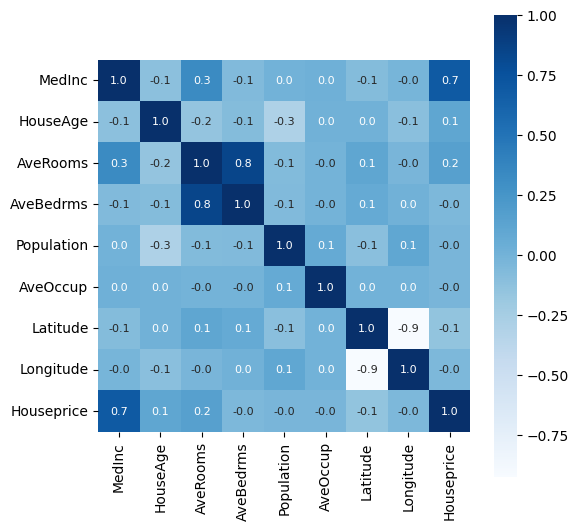

In [62]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,fmt='.1f',square=True,annot=True,annot_kws={'size':8},cmap='Blues')

Separating data and target.

In [73]:
features = dataframe.drop(['Houseprice'],axis=1)
label = dataframe['Houseprice']
print(features)
print(label)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data into training and testing purposes.

In [82]:
X_train,x_test,Y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=2)
print(features.shape,X_train.shape,x_test.shape)
print(label.shape,Y_train.shape,y_test.shape)

(20640, 8) (16512, 8) (4128, 8)
(20640,) (16512,) (4128,)


In [84]:
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluating the model

In [86]:
training_data_prediction = model.predict(X_train)
training_data_prediction

array([0.5523039, 3.0850039, 0.5835302, ..., 1.9204227, 1.952873 ,
       0.6768683], dtype=float32)

In [89]:
r_score = metrics.r2_score(Y_train,training_data_prediction)
mse = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R Square error:",r_score)
print("Mean Absolute error:",mse)

R Square error: 0.943650140819218
Mean Absolute error: 0.1933648700612105


Small visulization on actual vs model predicted results

Text(0.5, 1.0, 'Original prices vs Model predicted prices')

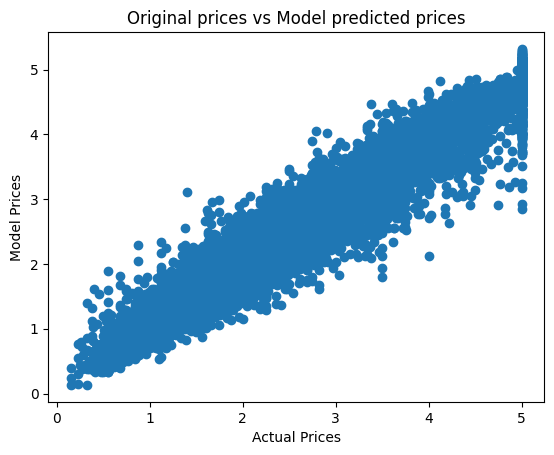

In [95]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Model Prices")
plt.title("Original prices vs Model predicted prices")

In [90]:
test_data_prediction = model.predict(x_test)
test_data_prediction

array([2.8649795 , 1.790346  , 0.92074925, ..., 1.5385513 , 0.92647874,
       2.043316  ], dtype=float32)

In [91]:
r_score = metrics.r2_score(y_test,test_data_prediction)
mse = metrics.mean_absolute_error(y_test,test_data_prediction)
print("R Square error:",r_score)
print("Mean Absolute error:",mse)

R Square error: 0.8338000331788725
Mean Absolute error: 0.3108631800268186
